In [62]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt

In [63]:
consumerKey = 'qHDlZqswgH4LoA8cUAiEKEXQs'
consumerSecret = 'Wu9WL4PLJWj41Iu2hRfezqwChmHOVoYiMHz6NFu7ZMY1QNtgdq'
accessToken = '1512020358597324800-89OgoCg5zK8P4zI5mjCnvJ3tlUe0QJ'
accessTokenSecret = 'YjiwwCMxZOUuGXbUxR08F2g48faizwRMtUiqrQ9sw36Xw'

auth = tweepy.OAuthHandler(consumer_key=consumerKey,consumer_secret=consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)

In [65]:
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [66]:
searchTerm = input("Enter the keyword to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

Enter the keyword to search about: cricket
Enter how many tweets to search: 200


In [67]:
positive, negative, neutral, polarity = 0,0,0,0

for tweet in tweets:
  analysis = TextBlob(tweet.text)
  polarity += analysis.sentiment.polarity

  if (analysis.sentiment.polarity == 0.00): 
      neutral += 1
  
  elif (analysis.sentiment.polarity > 0.00):
      positive += 1
  
  elif (analysis.sentiment.polarity < 0.00):
      negative += 1


In [68]:
positive = percentage(positive,NoOfTerms)
negative = percentage(negative,NoOfTerms)
neutral = percentage(neutral,NoOfTerms)



polarity = polarity / NoOfTerms

print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("General Report: ")

if (analysis.sentiment.polarity == 0): 
    print("Neutral")

elif (analysis.sentiment.polarity > 0):
    print("Positive")

elif (analysis.sentiment.polarity < 0):
    print("Negative")

How people are reacting on cricket by analyzing 200 tweets.

General Report: 
Positive


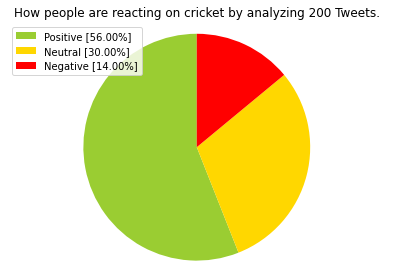

In [70]:
from matplotlib import patches
labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen','gold', 'red']
patches, text = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()